# IE 5374: Foundations of Data Analytics
# Project 1
# Group Members:
# 1) Neeraj Rangwani
# 2) Niral Desai
# 3) Deekshitha Prakash

# **Task 1**

In [313]:
#For Dunn Index
#!pip install validclust

In [314]:
#Importing the necessary libraries required for the project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import cut_tree
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from validclust import dunn
from sklearn.metrics import pairwise_distances
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score

In [315]:
#Function for K Means 
def kmeans_function(df, k):
  model = KMeans(n_clusters= k)
  km_clusters = model.fit_predict(df)
  return km_clusters

In [316]:
#Function for dendrograms
def dendrogram(data):
  plt.figure(figsize=(8, 6))    
  dg = shc.dendrogram(shc.linkage(data, method='ward'))
  plt.xlabel('Clusters')
  plt.ylabel('Euclidean Distance')
  plt.title("Dendrogram")
  plt.show()

In [317]:
#Recursively merging the clusters by using the linkage distance
def hchl_predict(data,k):
  hchl_clusters = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')  
  return hchl_clusters.fit_predict(data)

In [318]:
#Adding new labels to the dataframe
def category(data, category, type_cluster):
  if type_cluster == 'K Means':
    data['Kmeans_class'] = category
  elif type_cluster == 'Hierarchial':
    data['Hierarchial_class'] = category
  return data

# Dataset 1

In [319]:
#Dataset 1
df1 = pd.read_csv('/content/Data1.csv', index_col= 0)
df1.head()  #printing the first 5 rows of the dataset

,X1,X2,X3,Class
1,-0.063274,0.027734,0.022683,1
2,-0.000731,0.048211,0.069198,1
3,-0.060767,-0.009080,0.053085,1
4,0.013252,-0.011876,0.055324,1
5,-0.054508,-0.003813,0.001738,1


In [320]:
# general summary of the dataframe to check null values
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 1 to 212
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      212 non-null    float64
 1   X2      212 non-null    float64
 2   X3      212 non-null    float64
 3   Class   212 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 8.3 KB


In [321]:
# check the data type of each column
df1.dtypes

X1       float64
X2       float64
X3       float64
Class      int64
dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


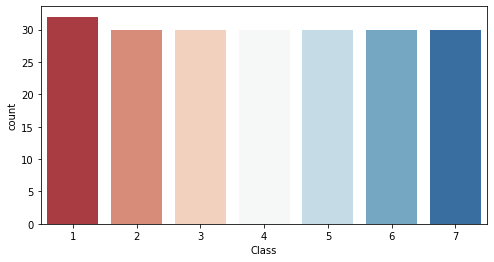

In [322]:
# Visualizing the distribution of the classes using countplot
plt.figure(figsize=(8, 4))
sns.countplot(df1['Class'], palette='RdBu')

In [323]:
#Calling the K Means function
clusters = kmeans_function(df1, df1['Class'].nunique())
#df1.iloc[:,1:4] - Selecting only the numerical values from the dataset
#df1['Class'].nunique() - Finding the value of K
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [324]:
#Adding the cluster values to the dataframe
df1 = category(df1, clusters, 'K Means')
df1

,X1,X2,X3,Class,Kmeans_class
1,-0.063274,0.027734,0.022683,1,0
2,-0.000731,0.048211,0.069198,1,0
3,-0.060767,-0.009080,0.053085,1,0
4,0.013252,-0.011876,0.055324,1,0
5,-0.054508,-0.003813,0.001738,1,0
...,...,...,...,...,...
208,0.175738,-0.053478,-2.733752,7,3
209,0.396046,-0.858377,-3.126866,7,3
210,-0.406362,-0.334541,-2.885598,7,3
211,-0.299275,0.071281,-3.642585,7,3


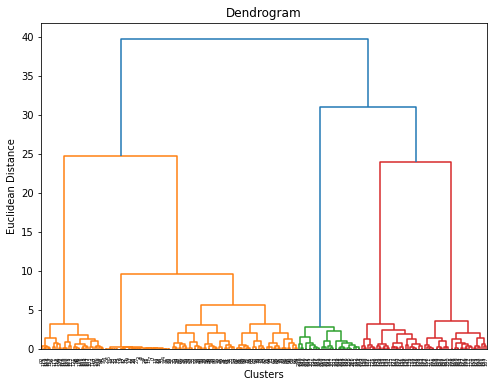

In [325]:
#Hierarchical Clustering Dendrogram
dendrogram(df1.iloc[:,1:4])

In [326]:
#Clusters for Hierarchical
hcl_clusters = hchl_predict(df1.iloc[:,1:4], df1['Class'].nunique())
hcl_clusters

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6])

In [327]:
#Adding Hierarchial Cluster Category to the dataframe
df1 = category(df1, hcl_clusters, 'Hierarchial')
df1

,X1,X2,X3,Class,Kmeans_class,Hierarchial_class
1,-0.063274,0.027734,0.022683,1,0,5
2,-0.000731,0.048211,0.069198,1,0,5
3,-0.060767,-0.009080,0.053085,1,0,5
4,0.013252,-0.011876,0.055324,1,0,5
5,-0.054508,-0.003813,0.001738,1,0,5
...,...,...,...,...,...,...
208,0.175738,-0.053478,-2.733752,7,3,6
209,0.396046,-0.858377,-3.126866,7,3,6
210,-0.406362,-0.334541,-2.885598,7,3,6
211,-0.299275,0.071281,-3.642585,7,3,6


In [328]:
#For class the value is ranging from 1 to 7 and values for K Means/Hierarchial range from 0 to 6. Hence to compare we add 1 in the KMeans/Hierarchial columns
df1['Kmeans_class'] = df1['Kmeans_class'] + 1
df1['Hierarchial_class'] = df1['Hierarchial_class'] + 1
df1

,X1,X2,X3,Class,Kmeans_class,Hierarchial_class
1,-0.063274,0.027734,0.022683,1,1,6
2,-0.000731,0.048211,0.069198,1,1,6
3,-0.060767,-0.009080,0.053085,1,1,6
4,0.013252,-0.011876,0.055324,1,1,6
5,-0.054508,-0.003813,0.001738,1,1,6
...,...,...,...,...,...,...
208,0.175738,-0.053478,-2.733752,7,4,7
209,0.396046,-0.858377,-3.126866,7,4,7
210,-0.406362,-0.334541,-2.885598,7,4,7
211,-0.299275,0.071281,-3.642585,7,4,7


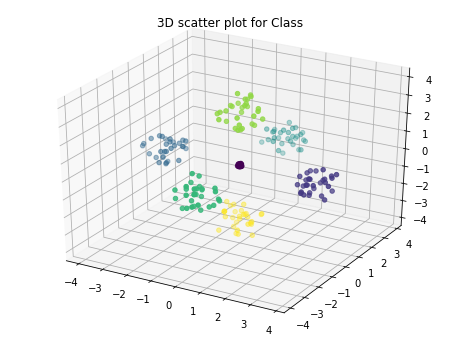

In [329]:
# Visualizing the clusters of class using scatter plot in 3D
plt.figure(figsize=(8, 6))  #Figure size
ax = plt.axes(projection ="3d")
#Plot
ax.scatter3D(df1['X1'], df1['X2'], df1['X3'], c = df1["Class"])
plt.title("3D scatter plot for Class")
# show plot
plt.show()

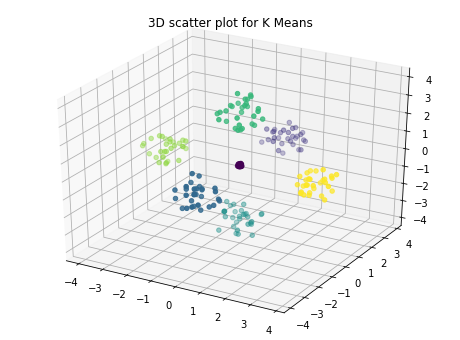

In [330]:
# Visualizing the clusters of KMeans using scatter plot in 3D
plt.figure(figsize=(8, 6))  #Figure size
ax = plt.axes(projection ="3d")
#Plot
ax.scatter3D(df1['X1'], df1['X2'], df1['X3'], c = df1["Kmeans_class"])
plt.title("3D scatter plot for K Means")
# show plot
plt.show()

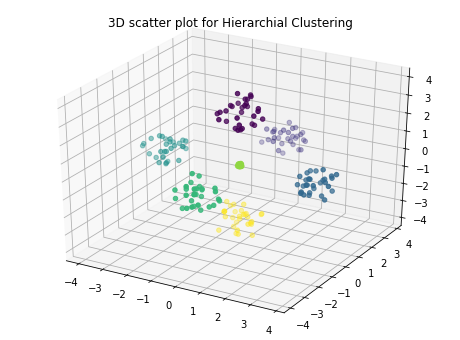

In [331]:
# Visualizing the clusters of Hierarchial using scatter plot in 3D
plt.figure(figsize=(8, 6))  #Figure size
ax = plt.axes(projection ="3d")
#Plot
ax.scatter3D(df1['X1'], df1['X2'], df1['X3'], c = df1["Hierarchial_class"])
plt.title("3D scatter plot for Hierarchial Clustering")
# show plot
plt.show()

In [332]:
#External Evalation for K Means
accuracy_score(df1['Class'], df1['Kmeans_class'])

0.1509433962264151

In [333]:
f1_score(df1['Class'], df1['Kmeans_class'], average='micro')

0.1509433962264151

In [334]:
#External Evalation for Hierarchial Clustering
accuracy_score(df1['Class'], df1['Hierarchial_class'])

0.2830188679245283

In [335]:
f1_score(df1['Class'], df1['Hierarchial_class'], average='micro')

0.2830188679245283

# Dataset 2

In [336]:
#Dataset 2
df2 = pd.read_csv('/content/Data2.csv', index_col= 0)
df2.head()  #printing the first 5 rows of the dataset

,X,Y,C,Class
X1,3.277701,0.814082,0.326574,1
X2,0.387577,0.176780,0.888046,1
X3,0.268546,0.582963,0.080981,1
X4,2.031145,0.244597,0.643921,1
X5,0.188677,0.461280,0.496633,1


In [337]:
# general summary of the dataframe to check null values
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404 entries, X1 to X.3
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       404 non-null    float64
 1   Y       404 non-null    float64
 2   C       404 non-null    float64
 3   Class   404 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 15.8+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


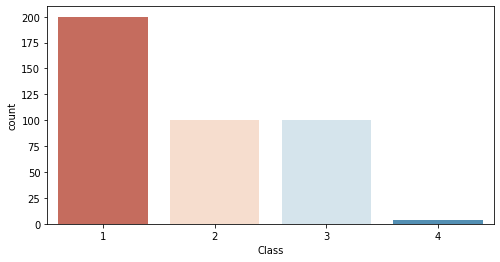

In [338]:
# Visualizing the distribution of the classes using countplot
plt.figure(figsize=(8, 4))
sns.countplot(df2['Class'], palette='RdBu')

In [339]:
#Calling the K Means function
clusters2 = kmeans_function(df2, df2['Class'].nunique())
#df2.iloc[:,1:4] - Selecting only the numerical values from the dataset
#df2['Class'].nunique() - Finding the value of K
clusters2

array([3, 0, 0, 3, 0, 3, 3, 3, 3, 0, 0, 3, 3, 0, 0, 3, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 0, 3, 0, 3, 0, 0, 3,
       0, 0, 0, 3, 3, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 3, 0, 3, 0, 3, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 0, 3, 0, 0, 0, 3, 3, 3, 0,
       3, 0, 0, 3, 0, 0, 0, 3, 0, 0, 3, 3, 3, 3, 0, 3, 0, 3, 0, 0, 3, 3,
       0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 3, 3, 0, 0, 3, 3, 0, 3, 3, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 3, 0, 3, 3, 3, 0, 0, 3, 0, 0, 3, 0,
       0, 3, 3, 0, 3, 3, 0, 3, 0, 3, 0, 0, 0, 0, 3, 3, 0, 0, 0, 3, 0, 0,
       3, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2,
       2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 1,

In [340]:
#Adding the K Means cluster values to the dataframe
df2 = category(df2, clusters2, 'K Means')
df2

,X,Y,C,Class,Kmeans_class
X1,3.277701,0.814082,0.326574,1,3
X2,0.387577,0.176780,0.888046,1,0
X3,0.268546,0.582963,0.080981,1,0
X4,2.031145,0.244597,0.643921,1,3
X5,0.188677,0.461280,0.496633,1,0
...,...,...,...,...,...
X400,3.248655,2.297291,3.388138,3,1
X,4.100000,5.100000,0.504558,4,1
X.1,3.900000,4.900000,0.941634,4,1
X.2,4.000000,5.000000,0.702123,4,1


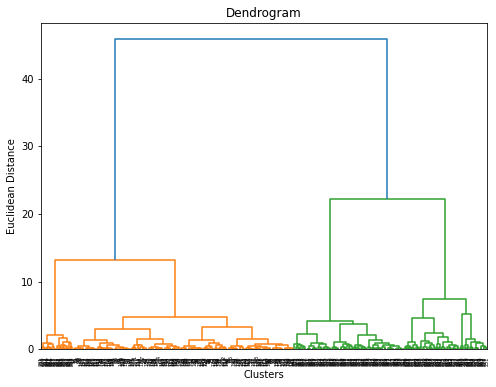

In [341]:
#Hierarchical Clustering Dendrogram
dendrogram(df2.iloc[:,1:4])

In [342]:
#Hierarchical Clusters
hcl_clusters2 = hchl_predict(df2.iloc[:,1:4], df2['Class'].nunique())
hcl_clusters2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 3, 0, 3, 0, 3, 3, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 3, 3, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 3, 0, 2,

In [343]:
#Adding Hierarchial Cluster Category to the dataframe
df2 = category(df2, hcl_clusters2, 'Hierarchial')
df2

,X,Y,C,Class,Kmeans_class,Hierarchial_class
X1,3.277701,0.814082,0.326574,1,3,1
X2,0.387577,0.176780,0.888046,1,0,1
X3,0.268546,0.582963,0.080981,1,0,1
X4,2.031145,0.244597,0.643921,1,3,1
X5,0.188677,0.461280,0.496633,1,0,1
...,...,...,...,...,...,...
X400,3.248655,2.297291,3.388138,3,1,2
X,4.100000,5.100000,0.504558,4,1,0
X.1,3.900000,4.900000,0.941634,4,1,0
X.2,4.000000,5.000000,0.702123,4,1,0


In [344]:
#For class the value is ranging from 1 to 7 and values for K Means/Hierarchial range from 0 to 6. Hence to compare we add 1 in the KMeans/Hierarchial columns
df2['Kmeans_class'] = df2['Kmeans_class'] + 1
df2['Hierarchial_class'] = df2['Hierarchial_class'] + 1
df2

,X,Y,C,Class,Kmeans_class,Hierarchial_class
X1,3.277701,0.814082,0.326574,1,4,2
X2,0.387577,0.176780,0.888046,1,1,2
X3,0.268546,0.582963,0.080981,1,1,2
X4,2.031145,0.244597,0.643921,1,4,2
X5,0.188677,0.461280,0.496633,1,1,2
...,...,...,...,...,...,...
X400,3.248655,2.297291,3.388138,3,2,3
X,4.100000,5.100000,0.504558,4,2,1
X.1,3.900000,4.900000,0.941634,4,2,1
X.2,4.000000,5.000000,0.702123,4,2,1


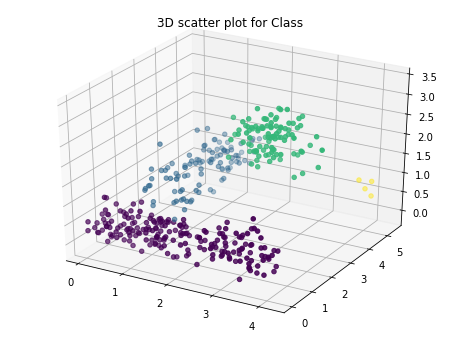

In [345]:
# Visualizing the clusters of class using scatter plot in 3D
plt.figure(figsize=(8, 6))  #Figure size
ax = plt.axes(projection ="3d")
#Plot
ax.scatter3D(df2['X'], df2['Y'], df2['C'], c = df2["Class"])
plt.title("3D scatter plot for Class")
# show plot
plt.show()

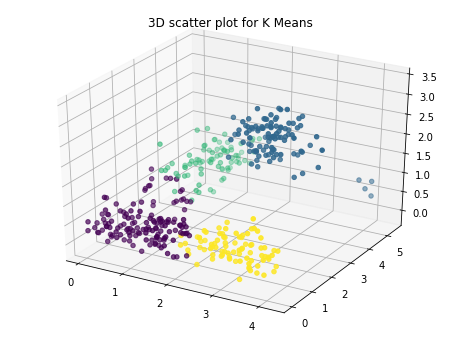

In [346]:
# Visualizing the clusters of KMeans using scatter plot in 3D
plt.figure(figsize=(8, 6))  #Figure size
ax = plt.axes(projection ="3d")
#Plot
ax.scatter3D(df2['X'], df2['Y'], df2['C'], c = df2["Kmeans_class"])
plt.title("3D scatter plot for K Means")
# show plot
plt.show()

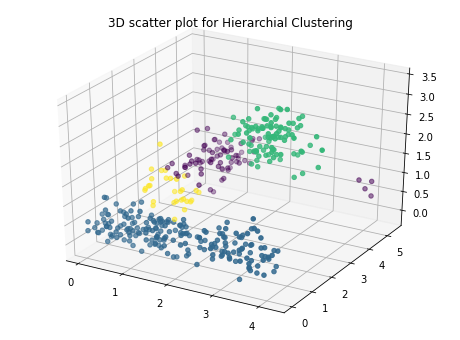

In [347]:
# Visualizing the clusters of Hierarchial using scatter plot in 3D
plt.figure(figsize=(8, 6))  #Figure size
ax = plt.axes(projection ="3d")
#Plot
ax.scatter3D(df2['X'], df2['Y'], df2['C'], c = df2["Hierarchial_class"])
plt.title("3D scatter plot for Hierarchial Clustering")
# show plot
plt.show()

In [348]:
#External Evalation for K Means
accuracy_score(df2['Class'], df2['Kmeans_class'])

0.2896039603960396

In [349]:
f1_score(df2['Class'], df2['Kmeans_class'], average='micro')

0.2896039603960396

In [350]:
#External Evalation for Hierarchial Clustering
accuracy_score(df2['Class'], df2['Hierarchial_class'])

0.24752475247524752

In [351]:
f1_score(df2['Class'], df2['Hierarchial_class'], average='micro')

0.24752475247524752

# Dataset 3

In [352]:
#Dataset 1
df3 = pd.read_csv('/content/Data3.csv', index_col= 0)
df3.head()  #printing the first 5 rows of the dataset

,X1,X2,X3,Class
1,1.295428,0.050829,-0.385217,1
2,1.409178,-0.035191,-0.251980,1
3,1.096803,0.246365,-0.415011,1
4,1.463328,0.265354,-0.513488,1
5,1.603284,0.080577,-0.470257,1


In [353]:
# general summary of the dataframe to check null values
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      400 non-null    float64
 1   X2      400 non-null    float64
 2   X3      400 non-null    float64
 3   Class   400 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 15.6 KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


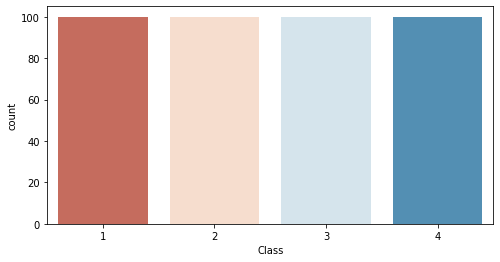

In [354]:
# Visualizing the distribution of the classes using countplot
plt.figure(figsize=(8, 4))
sns.countplot(df3['Class'], palette='RdBu')

In [355]:
#Calling the K Means function
clusters3 = kmeans_function(df3, df3['Class'].nunique())
#df3.iloc[:,1:4] - Selecting only the numerical values from the dataset
#df3['Class'].nunique() - Finding the value of K
clusters3

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1,

In [356]:
#Adding the K Means cluster values to the dataframe
df3 = category(df3, clusters3, 'K Means')
df3

,X1,X2,X3,Class,Kmeans_class
1,1.295428,0.050829,-0.385217,1,2
2,1.409178,-0.035191,-0.251980,1,2
3,1.096803,0.246365,-0.415011,1,2
4,1.463328,0.265354,-0.513488,1,2
5,1.603284,0.080577,-0.470257,1,2
...,...,...,...,...,...
396,0.795695,0.209456,1.880609,4,1
397,0.653127,-0.703156,1.549448,4,1
398,-0.726249,-0.103244,0.694300,4,1
399,0.808596,-0.492640,1.649370,4,1


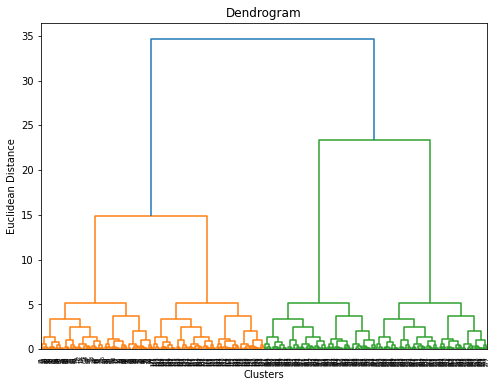

In [357]:
#Hierarchical Clustering
dendrogram(df3.iloc[:,1:4])

In [358]:
hcl_clusters3 = hchl_predict(df3.iloc[:,1:4], df3['Class'].nunique())
hcl_clusters3

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,

In [359]:
#Adding Hierarchial Cluster Category
df3 = category(df3, hcl_clusters3, 'Hierarchial')
df3

,X1,X2,X3,Class,Kmeans_class,Hierarchial_class
1,1.295428,0.050829,-0.385217,1,2,3
2,1.409178,-0.035191,-0.251980,1,2,3
3,1.096803,0.246365,-0.415011,1,2,3
4,1.463328,0.265354,-0.513488,1,2,3
5,1.603284,0.080577,-0.470257,1,2,3
...,...,...,...,...,...,...
396,0.795695,0.209456,1.880609,4,1,2
397,0.653127,-0.703156,1.549448,4,1,2
398,-0.726249,-0.103244,0.694300,4,1,2
399,0.808596,-0.492640,1.649370,4,1,2


In [360]:
#For class the value is ranging from 1 to 7 and values for K Means/Hierarchial range from 0 to 6. Hence to compare we add 1 in the KMeans/Hierarchial columns
df3['Kmeans_class'] = df3['Kmeans_class'] + 1
df3['Hierarchial_class'] = df3['Hierarchial_class'] + 1
df3

,X1,X2,X3,Class,Kmeans_class,Hierarchial_class
1,1.295428,0.050829,-0.385217,1,3,4
2,1.409178,-0.035191,-0.251980,1,3,4
3,1.096803,0.246365,-0.415011,1,3,4
4,1.463328,0.265354,-0.513488,1,3,4
5,1.603284,0.080577,-0.470257,1,3,4
...,...,...,...,...,...,...
396,0.795695,0.209456,1.880609,4,2,3
397,0.653127,-0.703156,1.549448,4,2,3
398,-0.726249,-0.103244,0.694300,4,2,3
399,0.808596,-0.492640,1.649370,4,2,3


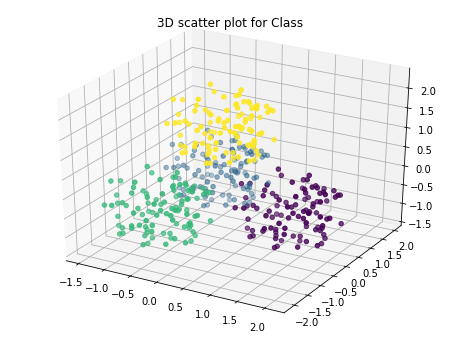

In [361]:
# Visualizing the clusters of class using scatter plot in 3D
plt.figure(figsize=(8, 6))  #Figure size
ax = plt.axes(projection ="3d")
#Plot
ax.scatter3D(df3['X1'], df3['X2'], df3['X3'], c = df3["Class"])
plt.title("3D scatter plot for Class")
# show plot
plt.show()

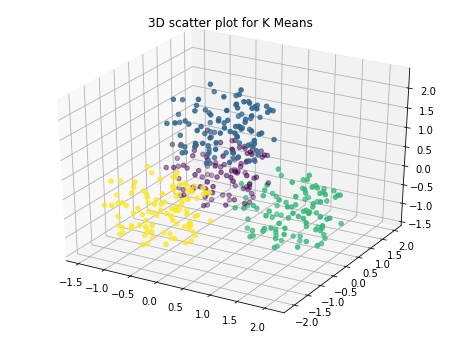

In [362]:
# Visualizing the clusters of class using scatter plot in 3D
plt.figure(figsize=(8, 6))  #Figure size
ax = plt.axes(projection ="3d")
#Plot
ax.scatter3D(df3['X1'], df3['X2'], df3['X3'], c = df3["Kmeans_class"])
plt.title("3D scatter plot for K Means")
# show plot
plt.show()

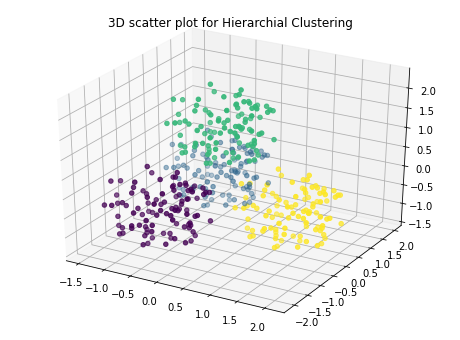

In [363]:
# Visualizing the clusters of Hierarchial class using scatter plot in 3D
plt.figure(figsize=(8, 6))  #Figure size
ax = plt.axes(projection ="3d")
#Plot
ax.scatter3D(df3['X1'], df3['X2'], df3['X3'], c = df3["Hierarchial_class"])
plt.title("3D scatter plot for Hierarchial Clustering")
# show plot
plt.show()

In [364]:
#External Evalation for K Means
accuracy_score(df3['Class'], df3['Kmeans_class'])

0.0

In [365]:
f1_score(df3['Class'], df3['Kmeans_class'], average='micro')

0.0

In [366]:
#External Evalation for Hierarchial Clustering
accuracy_score(df3['Class'], df3['Hierarchial_class'])

0.25

In [367]:
f1_score(df3['Class'], df3['Hierarchial_class'], average='micro')

0.25

# Dataset 4

In [368]:
#Dataset 4
df4 = pd.read_csv('/content/Data4.csv', index_col= 0)
df4.head()  #printing the first 5 rows of the dataset

,X1,X2,X3,Class
1,-0.4530,-0.891,0.02300,1
2,0.6530,-0.846,0.02110,1
3,0.3980,0.913,-0.00139,1
4,0.0952,1.050,0.00628,1
5,0.5240,-0.941,0.03780,1


In [369]:
# general summary of the dataframe to check null values
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      1000 non-null   float64
 1   X2      1000 non-null   float64
 2   X3      1000 non-null   float64
 3   Class   1000 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 39.1 KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


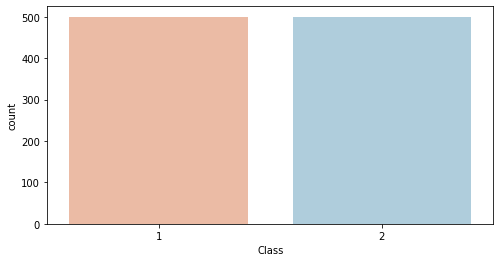

In [370]:
# Visualizing the distribution of the classes using countplot
plt.figure(figsize=(8, 4))
sns.countplot(df4['Class'], palette='RdBu')

In [371]:
#Calling the K Means function
clusters4 = kmeans_function(df4, df4['Class'].nunique())
#df4.iloc[:,1:4] - Selecting only the numerical values from the dataset
#df4['Class'].nunique() - Finding the value of K
clusters4


array([0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,

In [372]:
#Adding the K Means cluster values to the dataframe
df4 = category(df4, clusters4, 'K Means')
df4

,X1,X2,X3,Class,Kmeans_class
1,-0.45300,-0.8910,0.02300,1,0
2,0.65300,-0.8460,0.02110,1,0
3,0.39800,0.9130,-0.00139,1,1
4,0.09520,1.0500,0.00628,1,1
5,0.52400,-0.9410,0.03780,1,0
...,...,...,...,...,...
996,0.01520,0.0531,-0.36100,2,1
997,0.05160,0.6910,0.87500,2,1
998,-0.00511,1.3900,-0.94700,2,1
999,-0.06710,0.7140,0.88100,2,1


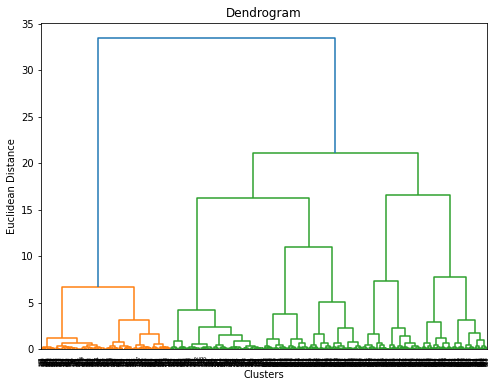

In [373]:
#Hierarchical Clustering
dendrogram(df4.iloc[:,1:4])

In [374]:
hcl_clusters4 = hchl_predict(df4.iloc[:,1:4], df4['Class'].nunique())
hcl_clusters4


array([1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,

In [375]:
#Adding Hierarchial Cluster Category
df4 = category(df4, hcl_clusters4, 'Hierarchial')
df4


,X1,X2,X3,Class,Kmeans_class,Hierarchial_class
1,-0.45300,-0.8910,0.02300,1,0,1
2,0.65300,-0.8460,0.02110,1,0,1
3,0.39800,0.9130,-0.00139,1,1,0
4,0.09520,1.0500,0.00628,1,1,0
5,0.52400,-0.9410,0.03780,1,0,1
...,...,...,...,...,...,...
996,0.01520,0.0531,-0.36100,2,1,0
997,0.05160,0.6910,0.87500,2,1,0
998,-0.00511,1.3900,-0.94700,2,1,0
999,-0.06710,0.7140,0.88100,2,1,0


In [376]:
#For class the value is ranging from 1 to 7 and values for K Means/Hierarchial range from 0 to 6. Hence to compare we add 1 in the KMeans/Hierarchial columns
df4['Kmeans_class'] = df4['Kmeans_class'] + 1
df4['Hierarchial_class'] = df4['Hierarchial_class'] + 1
df4

,X1,X2,X3,Class,Kmeans_class,Hierarchial_class
1,-0.45300,-0.8910,0.02300,1,1,2
2,0.65300,-0.8460,0.02110,1,1,2
3,0.39800,0.9130,-0.00139,1,2,1
4,0.09520,1.0500,0.00628,1,2,1
5,0.52400,-0.9410,0.03780,1,1,2
...,...,...,...,...,...,...
996,0.01520,0.0531,-0.36100,2,2,1
997,0.05160,0.6910,0.87500,2,2,1
998,-0.00511,1.3900,-0.94700,2,2,1
999,-0.06710,0.7140,0.88100,2,2,1


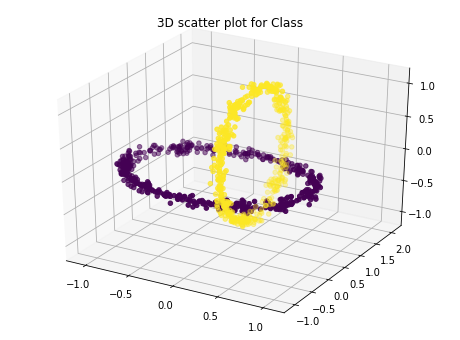

In [377]:
# Visualizing the clusters of class using scatter plot in 3D
plt.figure(figsize=(8, 6))  #Figure size
ax = plt.axes(projection ="3d")
#Plot
ax.scatter3D(df4['X1'], df4['X2'], df4['X3'], c = df4["Class"])
plt.title("3D scatter plot for Class")
# show plot
plt.show()


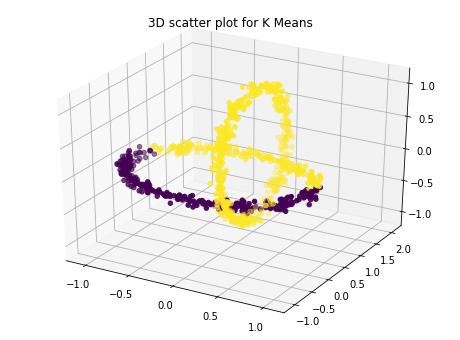

In [378]:
# Visualizing the clusters of KMeans using scatter plot in 3D
plt.figure(figsize=(8, 6))  #Figure size
ax = plt.axes(projection ="3d")
#Plot
ax.scatter3D(df4['X1'], df4['X2'], df4['X3'], c = df4["Kmeans_class"])
plt.title("3D scatter plot for K Means")
# show plot
plt.show()

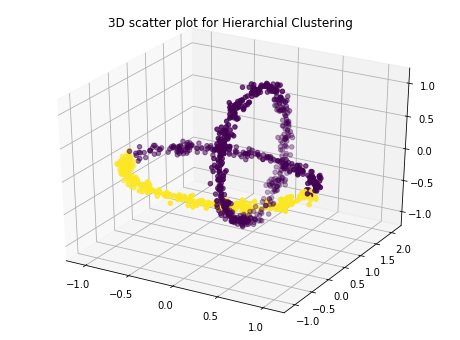

In [379]:
# Visualizing the clusters of Hierarchial using scatter plot in 3D
plt.figure(figsize=(8, 6))  #Figure size
ax = plt.axes(projection ="3d")
#Plot
ax.scatter3D(df4['X1'], df4['X2'], df4['X3'], c = df4["Hierarchial_class"])
plt.title("3D scatter plot for Hierarchial Clustering")
# show plot
plt.show()

In [380]:
#External Evalation for K Means	
accuracy_score(df4['Class'], df4['Kmeans_class'])

0.814

In [381]:
f1_score(df4['Class'], df4['Kmeans_class'], average='micro')

0.8140000000000001

In [382]:
#External Evalation for Hierarchial Clustering
accuracy_score(df4['Class'], df4['Hierarchial_class'])

0.21

In [383]:
f1_score(df4['Class'], df4['Hierarchial_class'], average='micro')

0.20999999999999996

# Dataset 5

In [384]:
#Dataset 5
df5 = pd.read_csv('/content/Data5.csv', index_col= 0)
df5.head()  #printing the first 5 rows of the dataset

,X1,X2,X3,Class
1,-4.822490,-50.402170,4.020861,1
2,-44.460120,20.964670,-11.492060,1
3,50.001020,0.780748,9.134460,1
4,-41.699080,-22.310060,16.314120,1
5,4.425242,-4.666664,50.223740,1


In [385]:
# general summary of the dataframe to check null values
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1 to 800
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      800 non-null    float64
 1   X2      800 non-null    float64
 2   X3      800 non-null    float64
 3   Class   800 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 31.2 KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


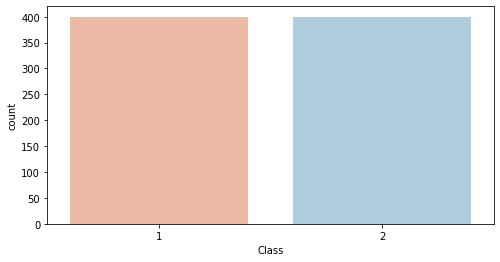

In [386]:
# Visualizing the distribution of the classes using countplot
plt.figure(figsize=(8, 4))
sns.countplot(df5['Class'], palette='RdBu')

In [387]:
#Calling the K Means function
clusters5 = kmeans_function(df5, df5['Class'].nunique())
#df5.iloc[:,1:4] - Selecting only the numerical values from the dataset
#df5['Class'].nunique() - Finding the value of K
clusters5

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,

In [388]:
#Adding the K Means cluster values to the dataframe
df5 = category(df5, clusters5, 'K Means')
df5

,X1,X2,X3,Class,Kmeans_class
1,-4.822490,-50.402170,4.020861,1,0
2,-44.460120,20.964670,-11.492060,1,0
3,50.001020,0.780748,9.134460,1,0
4,-41.699080,-22.310060,16.314120,1,1
5,4.425242,-4.666664,50.223740,1,1
...,...,...,...,...,...
796,-1.531027,0.681636,0.543271,2,0
797,0.500754,-1.848209,0.605654,2,0
798,1.089574,-0.246493,-3.355758,2,0
799,-1.907717,4.964502,2.098423,2,0


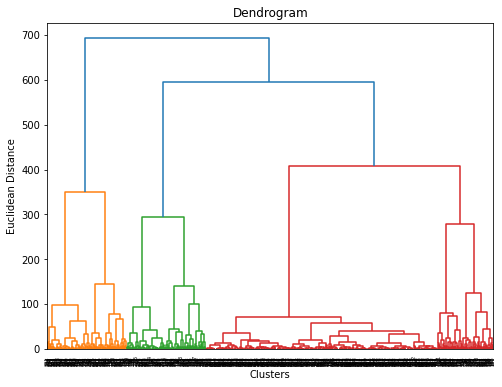

In [389]:
#Hierarchical Clustering
dendrogram(df5.iloc[:,1:4])

In [390]:
hcl_clusters5 = hchl_predict(df5.iloc[:,1:4], df5['Class'].nunique())
hcl_clusters5

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,

In [391]:
#Adding Hierarchial Cluster Category
df5 = category(df5, hcl_clusters5, 'Hierarchial')
df5

,X1,X2,X3,Class,Kmeans_class,Hierarchial_class
1,-4.822490,-50.402170,4.020861,1,0,1
2,-44.460120,20.964670,-11.492060,1,0,0
3,50.001020,0.780748,9.134460,1,0,0
4,-41.699080,-22.310060,16.314120,1,1,0
5,4.425242,-4.666664,50.223740,1,1,0
...,...,...,...,...,...,...
796,-1.531027,0.681636,0.543271,2,0,0
797,0.500754,-1.848209,0.605654,2,0,0
798,1.089574,-0.246493,-3.355758,2,0,0
799,-1.907717,4.964502,2.098423,2,0,0


In [392]:
#For class the value is ranging from 1 to 7 and values for K Means/Hierarchial range from 0 to 6. Hence to compare we add 1 in the KMeans/Hierarchial columns
df5['Kmeans_class'] = df5['Kmeans_class'] + 1
df5['Hierarchial_class'] = df5['Hierarchial_class'] + 1
df5

,X1,X2,X3,Class,Kmeans_class,Hierarchial_class
1,-4.822490,-50.402170,4.020861,1,1,2
2,-44.460120,20.964670,-11.492060,1,1,1
3,50.001020,0.780748,9.134460,1,1,1
4,-41.699080,-22.310060,16.314120,1,2,1
5,4.425242,-4.666664,50.223740,1,2,1
...,...,...,...,...,...,...
796,-1.531027,0.681636,0.543271,2,1,1
797,0.500754,-1.848209,0.605654,2,1,1
798,1.089574,-0.246493,-3.355758,2,1,1
799,-1.907717,4.964502,2.098423,2,1,1


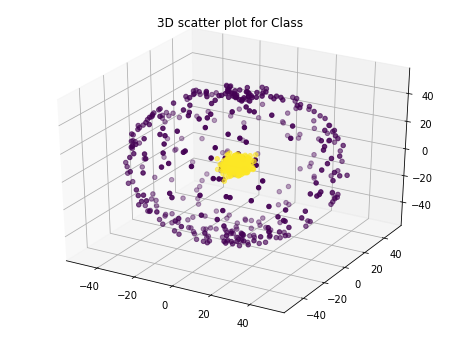

In [393]:
# Visualizing the clusters of class using scatter plot in 3D
plt.figure(figsize=(8, 6))  #Figure size
ax = plt.axes(projection ="3d")
#Plot
ax.scatter3D(df5['X1'], df5['X2'], df5['X3'], c = df5["Class"])
plt.title("3D scatter plot for Class")
# show plot
plt.show()

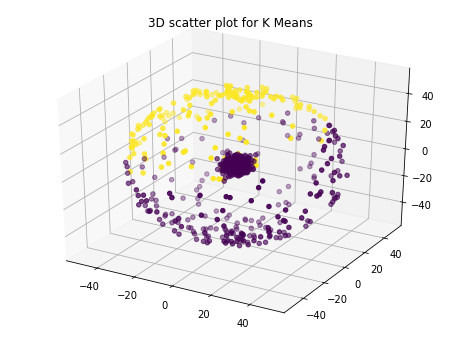

In [394]:
# Visualizing the clusters of KMeans using scatter plot in 3D
plt.figure(figsize=(8, 6))  #Figure size
ax = plt.axes(projection ="3d")
#Plot
ax.scatter3D(df5['X1'], df5['X2'], df5['X3'], c = df5["Kmeans_class"])
plt.title("3D scatter plot for K Means")
# show plot
plt.show()

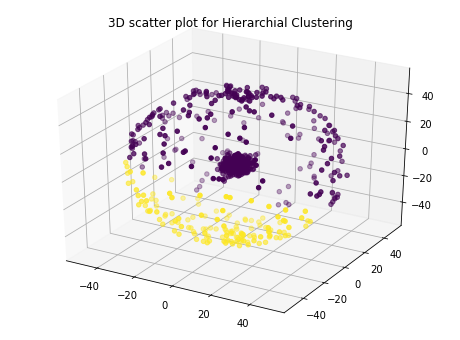

In [395]:
# Visualizing the clusters of Hierarchial using scatter plot in 3D
plt.figure(figsize=(8, 6))  #Figure size
ax = plt.axes(projection ="3d")
#Plot
ax.scatter3D(df5['X1'], df5['X2'], df5['X3'], c = df5["Hierarchial_class"])
plt.title("3D scatter plot for Hierarchial Clustering")
# show plot
plt.show()

In [396]:
#External Evalation for K Means	
accuracy_score(df5['Class'], df5['Kmeans_class'])

0.28625

In [397]:
f1_score(df5['Class'], df5['Kmeans_class'], average='micro')

0.28625

In [398]:
#External Evalation for Hierarchial Clustering
accuracy_score(df5['Class'], df5['Hierarchial_class'])

0.32125

In [399]:
f1_score(df5['Class'], df5['Hierarchial_class'], average='micro')

0.32125

# Dataset 6

In [400]:
#Dataset 2
df6 = pd.read_csv('/content/Data6.csv', index_col= 0)
df6.head()  #printing the first 5 rows of the dataset

,X1,X2,Class
1,1.388261,2.076096,1
2,2.177247,3.102304,1
3,0.378645,5.307610,1
4,3.681732,1.622681,1
5,2.462861,2.777897,1


In [401]:
# general summary of the dataframe to check null values
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4096 entries, 1 to 4096
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      4096 non-null   float64
 1   X2      4096 non-null   float64
 2   Class   4096 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 128.0 KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


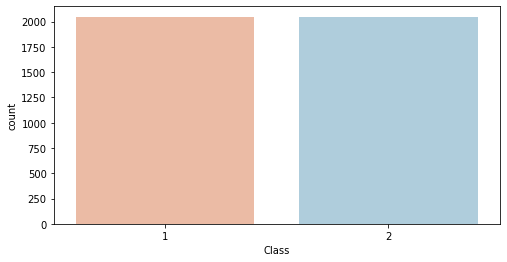

In [402]:
# Visualizing the distribution of the classes using countplot
plt.figure(figsize=(8, 4))
sns.countplot(df6['Class'], palette='RdBu')

In [403]:
#Calling the K Means function
clusters6 = kmeans_function(df6, df6['Class'].nunique())
#df6.iloc[:,1:4] - Selecting only the numerical values from the dataset
#df6['Class'].nunique() - Finding the value of K
clusters6

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [404]:
#Adding the K Means cluster values to the dataframe
df6 = category(df6, clusters6, 'K Means')
df6

,X1,X2,Class,Kmeans_class
1,1.388261,2.076096,1,1
2,2.177247,3.102304,1,1
3,0.378645,5.307610,1,1
4,3.681732,1.622681,1,1
5,2.462861,2.777897,1,1
...,...,...,...,...
4092,0.909687,0.375763,2,0
4093,2.698381,0.511262,2,0
4094,1.078797,1.526153,2,0
4095,1.974889,-0.649343,2,0


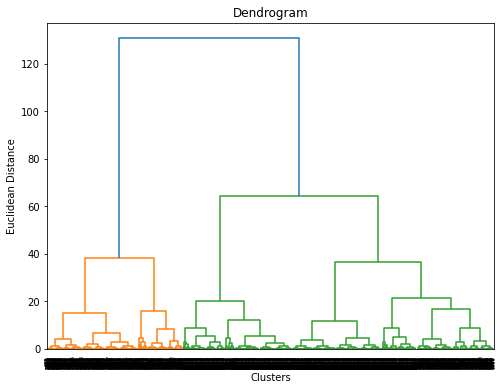

In [405]:
#Hierarchical Clustering
dendrogram(df6.iloc[:,1:3])

In [406]:
hcl_clusters6 = hchl_predict(df6.iloc[:,1:3], df6['Class'].nunique())
hcl_clusters6

array([0, 1, 1, ..., 0, 0, 0])

In [407]:
df6 = category(df6, hcl_clusters6, 'Hierarchial')
df6

,X1,X2,Class,Kmeans_class,Hierarchial_class
1,1.388261,2.076096,1,1,0
2,2.177247,3.102304,1,1,1
3,0.378645,5.307610,1,1,1
4,3.681732,1.622681,1,1,0
5,2.462861,2.777897,1,1,1
...,...,...,...,...,...
4092,0.909687,0.375763,2,0,0
4093,2.698381,0.511262,2,0,0
4094,1.078797,1.526153,2,0,0
4095,1.974889,-0.649343,2,0,0


In [408]:
#For class the value is ranging from 1 to 7 and values for K Means/Hierarchial range from 0 to 6. Hence to compare we add 1 in the KMeans/Hierarchial columns
df6['Kmeans_class'] = df6['Kmeans_class'] + 1
df6['Hierarchial_class'] = df6['Hierarchial_class'] + 1
df6

,X1,X2,Class,Kmeans_class,Hierarchial_class
1,1.388261,2.076096,1,2,1
2,2.177247,3.102304,1,2,2
3,0.378645,5.307610,1,2,2
4,3.681732,1.622681,1,2,1
5,2.462861,2.777897,1,2,2
...,...,...,...,...,...
4092,0.909687,0.375763,2,1,1
4093,2.698381,0.511262,2,1,1
4094,1.078797,1.526153,2,1,1
4095,1.974889,-0.649343,2,1,1


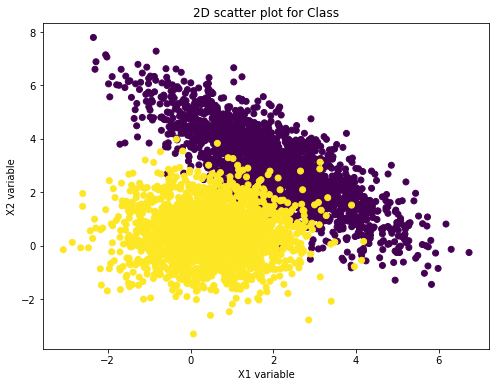

In [409]:
# Visualizing the clusters of class using scatter plot in 2D
plt.figure(figsize=(8, 6))  #Figure size

#Plot
plt.scatter(df6['X1'], df6['X2'],c= df6['Class'])
plt.xlabel('X1 variable')
plt.ylabel('X2 variable')
plt.title("2D scatter plot for Class")
# show plot
plt.show()

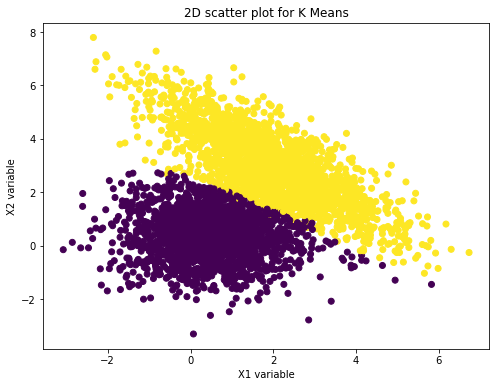

In [410]:
# Visualizing the clusters of class using scatter plot in 2D
plt.figure(figsize=(8, 6))  #Figure size

#Plot
plt.scatter(df6['X1'], df6['X2'],c= df6['Kmeans_class'])
plt.xlabel('X1 variable')
plt.ylabel('X2 variable')
plt.title("2D scatter plot for K Means")
# show plot
plt.show()

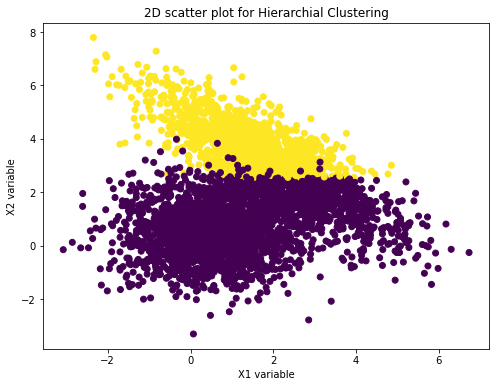

In [411]:
# Visualizing the clusters of class using scatter plot in 2D
plt.figure(figsize=(8, 6))  #Figure size

#Plot
plt.scatter(df6['X1'], df6['X2'],c= df6['Hierarchial_class'])
plt.xlabel('X1 variable')
plt.ylabel('X2 variable')
plt.title("2D scatter plot for Hierarchial Clustering")
# show plot
plt.show()

In [412]:
#External Evalation for K Means	
accuracy_score(df6['Class'], df6['Kmeans_class'])

0.03369140625

In [413]:
f1_score(df6['Class'], df6['Kmeans_class'], average='micro')

0.03369140625

In [414]:
#External Evalation for Hierarchial Clustering
accuracy_score(df6['Class'], df6['Hierarchial_class'])

0.193359375

In [415]:
f1_score(df6['Class'], df6['Hierarchial_class'], average='micro')

0.193359375

# Dataset 7

In [416]:
#Dataset 7
df7 = pd.read_csv('/content/Data7.csv', index_col= 0)
df7.head()  #printing the first 5 rows of the dataset

,X1,X2,Class
1,-3.000000,-3.000000,5
2,-3.000000,3.000000,4
3,3.000000,-3.000000,6
4,3.000000,3.000000,3
5,-0.417091,0.114782,1


In [417]:
# general summary of the dataframe to check null values
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 770 entries, 1 to 770
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      770 non-null    float64
 1   X2      770 non-null    float64
 2   Class   770 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 24.1 KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


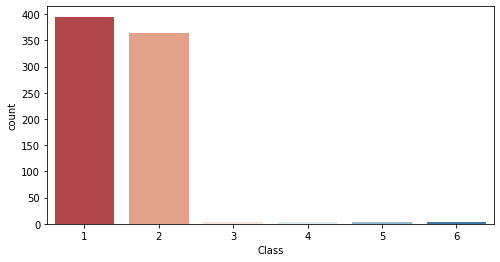

In [418]:
# Visualizing the distribution of the classes using countplot
plt.figure(figsize=(8, 4))
sns.countplot(df7['Class'], palette='RdBu')

In [419]:
#Calling the K Means function
clusters7 = kmeans_function(df7, df7['Class'].nunique())
#df7.iloc[:,1:4] - Selecting only the numerical values from the dataset
#df7['Class'].nunique() - Finding the value of K
clusters7

array([1, 0, 4, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [420]:
#Adding the K Means cluster values to the dataframe
df7 = category(df7, clusters7, 'K Means')
df7

,X1,X2,Class,Kmeans_class
1,-3.000000,-3.000000,5,1
2,-3.000000,3.000000,4,0
3,3.000000,-3.000000,6,4
4,3.000000,3.000000,3,5
5,-0.417091,0.114782,1,2
...,...,...,...,...
766,-1.604434,-1.118861,2,1
767,-3.050000,-3.050000,5,1
768,-3.050000,2.950000,4,0
769,2.950000,-3.050000,6,4


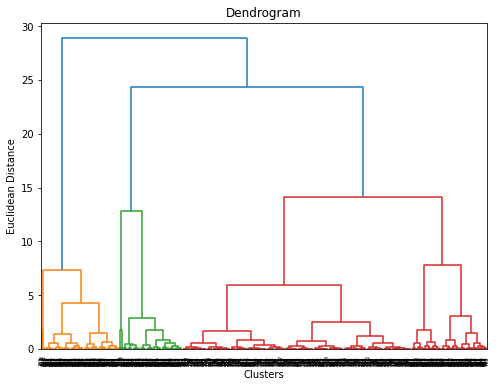

In [421]:
#Hierarchical Clustering Dendrogram
dendrogram(df7.iloc[:,1:3])

In [422]:
#Hierarchical Clusters
hcl_clusters7 = hchl_predict(df7.iloc[:,1:3], df7['Class'].nunique())
hcl_clusters7

array([4, 0, 4, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [423]:
#Adding Hierarchial Cluster Category
df7 = category(df7, hcl_clusters7, 'Hierarchial')
df7

,X1,X2,Class,Kmeans_class,Hierarchial_class
1,-3.000000,-3.000000,5,1,4
2,-3.000000,3.000000,4,0,0
3,3.000000,-3.000000,6,4,4
4,3.000000,3.000000,3,5,0
5,-0.417091,0.114782,1,2,1
...,...,...,...,...,...
766,-1.604434,-1.118861,2,1,2
767,-3.050000,-3.050000,5,1,4
768,-3.050000,2.950000,4,0,0
769,2.950000,-3.050000,6,4,4


In [424]:
#For class the value is ranging from 1 to 7 and values for K Means/Hierarchial range from 0 to 6. Hence to compare we add 1 in the KMeans/Hierarchial columns
df7['Kmeans_class'] = df7['Kmeans_class'] + 1
df7['Hierarchial_class'] = df7['Hierarchial_class'] + 1
df7

,X1,X2,Class,Kmeans_class,Hierarchial_class
1,-3.000000,-3.000000,5,2,5
2,-3.000000,3.000000,4,1,1
3,3.000000,-3.000000,6,5,5
4,3.000000,3.000000,3,6,1
5,-0.417091,0.114782,1,3,2
...,...,...,...,...,...
766,-1.604434,-1.118861,2,2,3
767,-3.050000,-3.050000,5,2,5
768,-3.050000,2.950000,4,1,1
769,2.950000,-3.050000,6,5,5


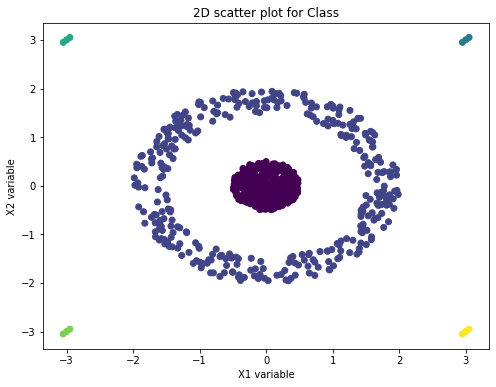

In [425]:
# Visualizing the clusters of class using scatter plot in 2D
plt.figure(figsize=(8, 6))  #Figure size

#Plot
plt.scatter(df7['X1'], df7['X2'],c= df7['Class'])
plt.xlabel('X1 variable')
plt.ylabel('X2 variable')
plt.title("2D scatter plot for Class")
# show plot
plt.show()

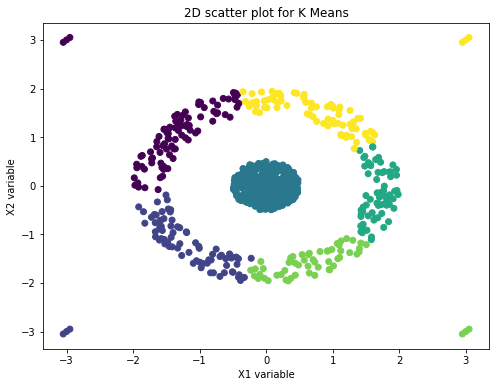

In [426]:
# Visualizing the clusters of class using scatter plot in 2D
plt.figure(figsize=(8, 6))  #Figure size

#Plot
plt.scatter(df7['X1'], df7['X2'],c= df7['Kmeans_class'])
plt.xlabel('X1 variable')
plt.ylabel('X2 variable')
plt.title("2D scatter plot for K Means")
# show plot
plt.show()

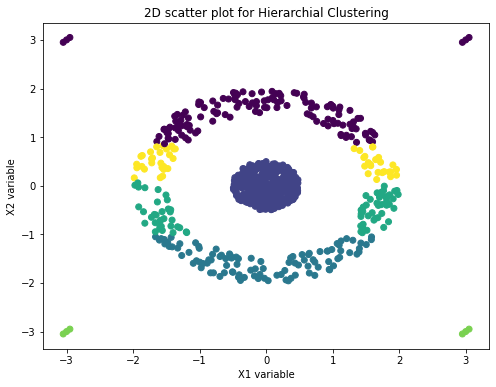

In [427]:
# Visualizing the clusters of class using scatter plot in 2D
plt.figure(figsize=(8, 6))  #Figure size

#Plot
plt.scatter(df7['X1'], df7['X2'],c= df7['Hierarchial_class'])
plt.xlabel('X1 variable')
plt.ylabel('X2 variable')
plt.title("2D scatter plot for Hierarchial Clustering")
# show plot
plt.show()

In [428]:
#External Evalation for K Means	
accuracy_score(df7['Class'], df7['Kmeans_class'])

0.1

In [429]:
f1_score(df7['Class'], df7['Kmeans_class'], average='micro')

0.10000000000000002

In [430]:
#External Evalation for Hierarchial Clustering
accuracy_score(df7['Class'], df7['Hierarchial_class'])

0.003896103896103896

In [431]:
f1_score(df7['Class'], df7['Hierarchial_class'], average='micro')

0.003896103896103896

# Dataset 8

In [432]:
#Dataset 8
df8 = pd.read_csv('/content/Data8.csv', index_col= 0)
df8.head()  #printing the first 5 rows of the dataset


,X1,X2,X3,Class
1,0.000000,0.000000,1.00000,1
2,0.000000,0.052336,0.99863,1
3,0.049774,0.016173,0.99863,1
4,0.030762,-0.042341,0.99863,1
5,-0.030762,-0.042341,0.99863,1


In [433]:
# general summary of the dataframe to check null values
df8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4002 entries, 1 to 4002
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      4002 non-null   float64
 1   X2      4002 non-null   float64
 2   X3      4002 non-null   float64
 3   Class   4002 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 156.3 KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


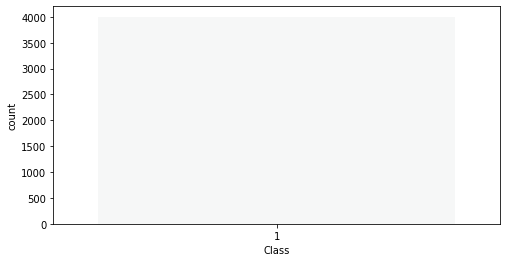

In [434]:
# Visualizing the distribution of the classes using countplot
plt.figure(figsize=(8, 4))
sns.countplot(df8['Class'], palette='RdBu')

In [435]:
#Calling the K Means function
clusters8 = kmeans_function(df8, df8['Class'].nunique())
#df8.iloc[:,1:4] - Selecting only the numerical values from the dataset
#df8['Class'].nunique() - Finding the value of K
clusters8

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [436]:
df8 = category(df8, clusters8, 'K Means')
df8

,X1,X2,X3,Class,Kmeans_class
1,0.000000,0.000000,1.00000,1,0
2,0.000000,0.052336,0.99863,1,0
3,0.049774,0.016173,0.99863,1,0
4,0.030762,-0.042341,0.99863,1,0
5,-0.030762,-0.042341,0.99863,1,0
...,...,...,...,...,...
3998,0.049774,-0.016173,-0.99863,1,0
3999,0.000000,-0.052336,-0.99863,1,0
4000,-0.049774,-0.016173,-0.99863,1,0
4001,-0.030762,0.042341,-0.99863,1,0


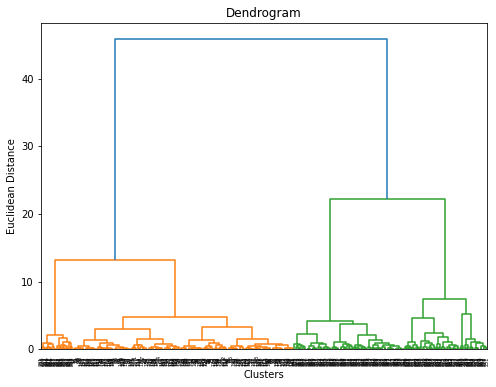

In [437]:
#Hierarchical Clustering
dendrogram(df2.iloc[:,1:4])

In [438]:
#Hierarchial Clusters
hcl_clusters8 = hchl_predict(df8.iloc[:,1:4], df8['Class'].nunique())
hcl_clusters8

array([0, 0, 0, ..., 0, 0, 0])

In [439]:
#Adding Hierarchial Cluster Category
df8 = category(df8, hcl_clusters8, 'Hierarchial')
df8

,X1,X2,X3,Class,Kmeans_class,Hierarchial_class
1,0.000000,0.000000,1.00000,1,0,0
2,0.000000,0.052336,0.99863,1,0,0
3,0.049774,0.016173,0.99863,1,0,0
4,0.030762,-0.042341,0.99863,1,0,0
5,-0.030762,-0.042341,0.99863,1,0,0
...,...,...,...,...,...,...
3998,0.049774,-0.016173,-0.99863,1,0,0
3999,0.000000,-0.052336,-0.99863,1,0,0
4000,-0.049774,-0.016173,-0.99863,1,0,0
4001,-0.030762,0.042341,-0.99863,1,0,0


In [440]:
#For class the value is ranging from 1 to 7 and values for K Means/Hierarchial range from 0 to 6. Hence to compare we add 1 in the KMeans/Hierarchial columns
df8['Kmeans_class'] = df8['Kmeans_class'] + 1
df8['Hierarchial_class'] = df8['Hierarchial_class'] + 1
df8

,X1,X2,X3,Class,Kmeans_class,Hierarchial_class
1,0.000000,0.000000,1.00000,1,1,1
2,0.000000,0.052336,0.99863,1,1,1
3,0.049774,0.016173,0.99863,1,1,1
4,0.030762,-0.042341,0.99863,1,1,1
5,-0.030762,-0.042341,0.99863,1,1,1
...,...,...,...,...,...,...
3998,0.049774,-0.016173,-0.99863,1,1,1
3999,0.000000,-0.052336,-0.99863,1,1,1
4000,-0.049774,-0.016173,-0.99863,1,1,1
4001,-0.030762,0.042341,-0.99863,1,1,1


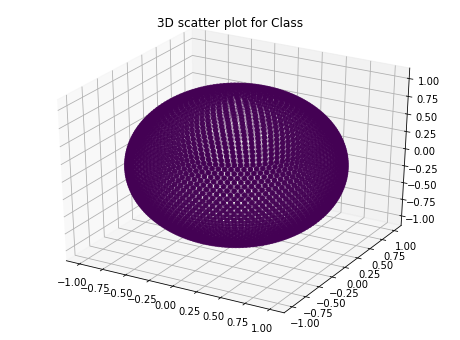

In [441]:
# Visualizing the clusters of class using scatter plot in 3D
plt.figure(figsize=(8, 6))  #Figure size
ax = plt.axes(projection ="3d")
#Plot
ax.scatter3D(df8['X1'], df8['X2'], df8['X3'], c = df8["Class"])
plt.title("3D scatter plot for Class")
# show plot
plt.show()

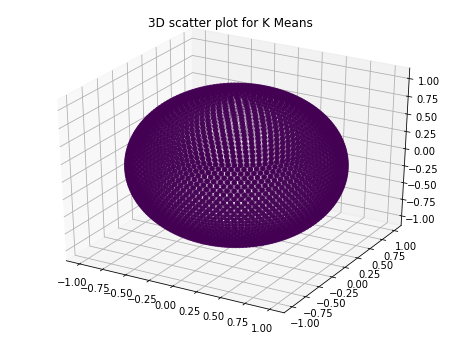

In [442]:
# Visualizing the clusters of class using scatter plot in 3D
plt.figure(figsize=(8, 6))  #Figure size
ax = plt.axes(projection ="3d")
#Plot
ax.scatter3D(df8['X1'], df8['X2'], df8['X3'], c = df8["Kmeans_class"])
plt.title("3D scatter plot for K Means")
# show plot
plt.show()

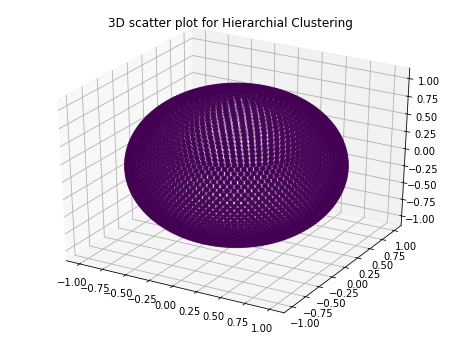

In [443]:
# Visualizing the clusters of class using scatter plot in 3D
plt.figure(figsize=(8, 6))  #Figure size
ax = plt.axes(projection ="3d")
#Plot
ax.scatter3D(df8['X1'], df8['X2'], df8['X3'], c = df8["Hierarchial_class"])
plt.title("3D scatter plot for Hierarchial Clustering")
# show plot
plt.show()

In [444]:
#External Evalation for K Means	
accuracy_score(df8['Class'], df8['Kmeans_class'])

1.0

In [445]:
f1_score(df8['Class'], df8['Kmeans_class'], average='micro')

1.0

In [446]:
#External Evalation for Hierarchial Clustering
accuracy_score(df8['Class'], df8['Hierarchial_class'])

1.0

In [447]:
f1_score(df8['Class'], df8['Hierarchial_class'], average='micro')

1.0

# **Task 2**

In [549]:
#Reading the world indicators dataset
df = pd.read_csv('/content/World Indicators.csv')
df.head()  #printing the first 5 rows of the dataset

,Birth Rate,Business Tax Rate,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.025,72.0%,25.0,41852.0,"$199,070,864,638",0.044,$233,451.0,0.023,0.1,0.080,72.0,69.0,0.9,0.272,0.681,0.047,0.682,Africa,Algeria
1,0.046,52.1%,66.0,13576.0,"$104,115,863,405",0.034,$178,282.0,0.107,0.1,0.188,53.0,50.0,0.5,0.477,0.499,0.024,0.409,Africa,Angola
2,0.037,65.9%,29.0,3761.0,"$7,294,900,431",0.045,$34,270.0,0.060,0.0,NaN,60.0,58.0,0.8,0.432,0.539,0.029,0.423,Africa,Benin
3,0.024,19.5%,60.0,2215.0,"$15,292,424,757",0.052,$404,152.0,0.039,0.1,0.110,46.0,47.0,1.5,0.340,0.625,0.035,0.565,Africa,Botswana
4,0.042,43.5%,13.0,NaN,"$10,395,757,480",0.064,$39,270.0,0.068,0.0,NaN,56.0,55.0,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso


In [550]:
# Removing the special characters from the dataset
df.replace(',','', regex=True, inplace=True)
df['Business Tax Rate'] = df['Business Tax Rate'].str.replace('\%','')
df['GDP'] = df['GDP'].str.replace('\$','')
df['Health Exp/Capita'] = df['Health Exp/Capita'].str.replace('\$','')
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


,Birth Rate,Business Tax Rate,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.025,72.0,25.0,41852.0,199070864638,0.044,233,451.0,0.023,0.1,0.080,72.0,69.0,0.9,0.272,0.681,0.047,0.682,Africa,Algeria
1,0.046,52.1,66.0,13576.0,104115863405,0.034,178,282.0,0.107,0.1,0.188,53.0,50.0,0.5,0.477,0.499,0.024,0.409,Africa,Angola
2,0.037,65.9,29.0,3761.0,7294900431,0.045,34,270.0,0.060,0.0,NaN,60.0,58.0,0.8,0.432,0.539,0.029,0.423,Africa,Benin
3,0.024,19.5,60.0,2215.0,15292424757,0.052,404,152.0,0.039,0.1,0.110,46.0,47.0,1.5,0.340,0.625,0.035,0.565,Africa,Botswana
4,0.042,43.5,13.0,NaN,10395757480,0.064,39,270.0,0.068,0.0,NaN,56.0,55.0,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso


In [551]:
#Checking the datatypes of the columns
df.dtypes

Birth Rate                float64
Business Tax Rate          object
Days to Start Business    float64
Energy Usage              float64
GDP                        object
Health Exp % GDP          float64
Health Exp/Capita          object
Hours to do Tax           float64
Infant Mortality Rate     float64
Internet Usage            float64
Lending Interest          float64
Life Expectancy Female    float64
Life Expectancy Male      float64
Mobile Phone Usage        float64
Population 0-14           float64
Population 15-64          float64
Population 65+            float64
Population Urban          float64
Region                     object
Country                    object
dtype: object

In [552]:
#Since the data type of Business Tax Rate, GDP, and Health Exp/Capita is object, we need to convert it to numeric values
#Coverting the data types
df['GDP'] = pd.to_numeric(df['GDP'],errors = 'coerce')
df['Health Exp/Capita'] = pd.to_numeric(df['Health Exp/Capita'])

In [553]:
df['Business Tax Rate'] = pd.to_numeric(df['Business Tax Rate'])

In [554]:
#Checking the datatypes of the columns in the dataset
df.dtypes

Birth Rate                float64
Business Tax Rate         float64
Days to Start Business    float64
Energy Usage              float64
GDP                       float64
Health Exp % GDP          float64
Health Exp/Capita         float64
Hours to do Tax           float64
Infant Mortality Rate     float64
Internet Usage            float64
Lending Interest          float64
Life Expectancy Female    float64
Life Expectancy Male      float64
Mobile Phone Usage        float64
Population 0-14           float64
Population 15-64          float64
Population 65+            float64
Population Urban          float64
Region                     object
Country                    object
dtype: object

In [555]:
#Checking the null values in the dataset
df.isna().sum()

Birth Rate                 9
Business Tax Rate         27
Days to Start Business    27
Energy Usage              72
GDP                       20
Health Exp % GDP          23
Health Exp/Capita         23
Hours to do Tax           28
Infant Mortality Rate     20
Internet Usage             9
Lending Interest          77
Life Expectancy Female    11
Life Expectancy Male      11
Mobile Phone Usage        12
Population 0-14           17
Population 15-64          17
Population 65+            17
Population Urban           2
Region                     0
Country                    0
dtype: int64

In [556]:
#Columns Energy Usage and Lending Interest have a lot of null values, so drop these 2 columns from the dataset
df = df.drop(['Lending Interest','Energy Usage'], axis=1)
df.head()

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.025,72.0,25.0,1.990709e+11,0.044,233.0,451.0,0.023,0.1,72.0,69.0,0.9,0.272,0.681,0.047,0.682,Africa,Algeria
1,0.046,52.1,66.0,1.041159e+11,0.034,178.0,282.0,0.107,0.1,53.0,50.0,0.5,0.477,0.499,0.024,0.409,Africa,Angola
2,0.037,65.9,29.0,7.294900e+09,0.045,34.0,270.0,0.060,0.0,60.0,58.0,0.8,0.432,0.539,0.029,0.423,Africa,Benin
3,0.024,19.5,60.0,1.529242e+10,0.052,404.0,152.0,0.039,0.1,46.0,47.0,1.5,0.340,0.625,0.035,0.565,Africa,Botswana
4,0.042,43.5,13.0,1.039576e+10,0.064,39.0,270.0,0.068,0.0,56.0,55.0,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso


In [557]:
#Dropping all the rows with NaN values
df=df.dropna(axis=0)
df.head()

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.025,72.0,25.0,1.990709e+11,0.044,233.0,451.0,0.023,0.1,72.0,69.0,0.9,0.272,0.681,0.047,0.682,Africa,Algeria
1,0.046,52.1,66.0,1.041159e+11,0.034,178.0,282.0,0.107,0.1,53.0,50.0,0.5,0.477,0.499,0.024,0.409,Africa,Angola
2,0.037,65.9,29.0,7.294900e+09,0.045,34.0,270.0,0.060,0.0,60.0,58.0,0.8,0.432,0.539,0.029,0.423,Africa,Benin
3,0.024,19.5,60.0,1.529242e+10,0.052,404.0,152.0,0.039,0.1,46.0,47.0,1.5,0.340,0.625,0.035,0.565,Africa,Botswana
4,0.042,43.5,13.0,1.039576e+10,0.064,39.0,270.0,0.068,0.0,56.0,55.0,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso


In [558]:
#Making a copy of the original dataset
df_world = df.copy()

In [560]:
#Data type of Columns Region and Country is object, so consider the dataset without these two columns
df = df.iloc[: , :-2]
df

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban
0,0.025,72.0,25.0,1.990709e+11,0.044,233.0,451.0,0.023,0.1,72.0,69.0,0.9,0.272,0.681,0.047,0.682
1,0.046,52.1,66.0,1.041159e+11,0.034,178.0,282.0,0.107,0.1,53.0,50.0,0.5,0.477,0.499,0.024,0.409
2,0.037,65.9,29.0,7.294900e+09,0.045,34.0,270.0,0.060,0.0,60.0,58.0,0.8,0.432,0.539,0.029,0.423
3,0.024,19.5,60.0,1.529242e+10,0.052,404.0,152.0,0.039,0.1,46.0,47.0,1.5,0.340,0.625,0.035,0.565
4,0.042,43.5,13.0,1.039576e+10,0.064,39.0,270.0,0.068,0.0,56.0,55.0,0.5,0.458,0.517,0.025,0.265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,0.018,27.9,694.0,4.363219e+09,0.060,490.0,199.0,0.022,0.3,74.0,67.0,1.0,0.283,0.652,0.065,0.663
202,0.015,29.1,41.0,2.367635e+10,0.053,935.0,210.0,0.020,0.6,73.0,66.0,1.4,0.207,0.708,0.085,0.089
204,0.013,46.5,5.0,1.553380e+13,0.177,8467.0,187.0,0.006,0.7,81.0,76.0,0.9,0.197,0.669,0.133,0.809
205,0.015,41.9,7.0,4.723671e+10,0.088,1213.0,336.0,0.010,0.5,80.0,73.0,1.4,0.223,0.638,0.139,0.946


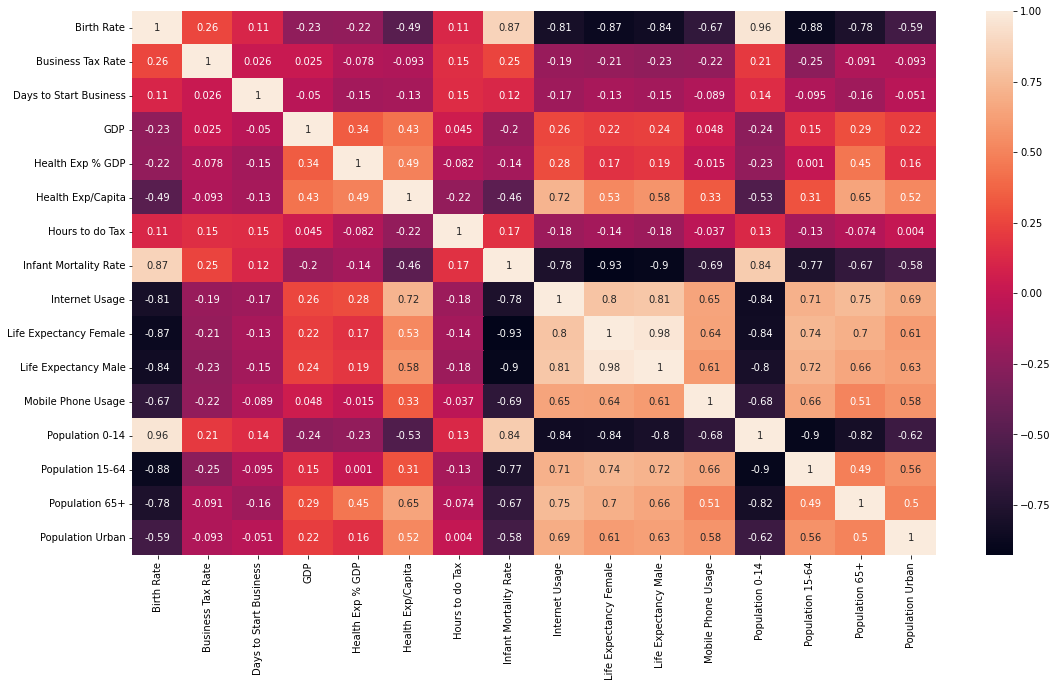

In [561]:
# Plotting the correlation matrix as heatmap
plt.figure(figsize=(18,10))
correl = df.corr()
sns.heatmap(correl, annot=True)
plt.show()

In [562]:
#Scaling the dataset using MinMax Scaler
x_scaled = MinMaxScaler().fit_transform(df)
df = pd.DataFrame(x_scaled, columns = df.iloc[:, 0:16].columns)  #scaling the data for the columns in the dataset
df

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban
0,0.404762,0.192319,0.034632,0.012804,0.158228,0.022332,0.169629,0.190909,0.111111,0.658537,0.666667,0.45,0.381471,0.539267,0.188034,0.650933
1,0.904762,0.132144,0.093795,0.006692,0.094937,0.016774,0.104328,0.954545,0.111111,0.195122,0.138889,0.25,0.940054,0.062827,0.089744,0.351262
2,0.690476,0.173874,0.040404,0.000459,0.164557,0.002223,0.099691,0.527273,0.000000,0.365854,0.361111,0.40,0.817439,0.167539,0.111111,0.366630
3,0.380952,0.033565,0.085137,0.000973,0.208861,0.039612,0.054096,0.336364,0.111111,0.024390,0.055556,0.75,0.566757,0.392670,0.136752,0.522503
4,0.809524,0.106138,0.017316,0.000658,0.284810,0.002728,0.099691,0.600000,0.000000,0.268293,0.277778,0.25,0.888283,0.109948,0.094017,0.193194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,0.238095,0.058966,1.000000,0.000270,0.259494,0.048302,0.072257,0.181818,0.333333,0.707317,0.611111,0.50,0.411444,0.463351,0.264957,0.630077
167,0.166667,0.062594,0.057720,0.001513,0.215190,0.093270,0.076507,0.163636,0.666667,0.682927,0.583333,0.70,0.204360,0.609948,0.350427,0.000000
168,0.119048,0.115210,0.005772,1.000000,1.000000,0.854386,0.067620,0.036364,0.777778,0.878049,0.861111,0.45,0.177112,0.507853,0.555556,0.790340
169,0.166667,0.101300,0.008658,0.003030,0.436709,0.121362,0.125193,0.072727,0.555556,0.853659,0.777778,0.70,0.247956,0.426702,0.581197,0.940724


In [563]:
#Silhoutte Analysis
list_silhoutte = []
list_calinski = []
list_dunn = []

In [564]:
#For loop function for appending all the values of clusters in the empty lists
for i in range(2,10):
  mdl = KMeans(n_clusters=i)
  mdl.fit(df)
  list_silhoutte.append(silhouette_score(df, mdl.labels_))
  list_calinski.append(calinski_harabasz_score(df, mdl.labels_))
  list_dunn.append(dunn(pairwise_distances(df),mdl.labels_ ))

In [565]:
#Calculating Silhouttte score for all the clusters
for i, j in zip(range(2,10), list_silhoutte):
  print('Silhouttte score when clusters = {} :'. format(i), j)

Silhouttte score when clusters = 2 : 0.42987453131766545
Silhouttte score when clusters = 3 : 0.3174578949750467
Silhouttte score when clusters = 4 : 0.2611688973892277
Silhouttte score when clusters = 5 : 0.2308028024264056
Silhouttte score when clusters = 6 : 0.20159589163273922
Silhouttte score when clusters = 7 : 0.1999180766310853
Silhouttte score when clusters = 8 : 0.2046333631349547
Silhouttte score when clusters = 9 : 0.1942051840089274


In [566]:
#Calculating the calinski harabasz score for all the clusters
for i, j in zip(range(len(list_calinski)), range(2,10)):
  print('Calinski score when clusters = {} :'. format(j), list_calinski[i])

Calinski score when clusters = 2 : 192.54525050508803
Calinski score when clusters = 3 : 153.00358419410696
Calinski score when clusters = 4 : 131.1480819898862
Calinski score when clusters = 5 : 111.9814871517288
Calinski score when clusters = 6 : 97.53027730459019
Calinski score when clusters = 7 : 89.0204952765904
Calinski score when clusters = 8 : 81.50300949438896
Calinski score when clusters = 9 : 75.69285257255218


In [567]:
#Calculating the dunn index score for all the clusters
for i, j in zip(range(len(list_dunn)), range(2,10)):
  print('Dunn Index score when clusters = {} :'. format(j), list_dunn[i])

Dunn Index score when clusters = 2 : 0.12192108167876109
Dunn Index score when clusters = 3 : 0.150141439870042
Dunn Index score when clusters = 4 : 0.15045077977937407
Dunn Index score when clusters = 5 : 0.16382434580533192
Dunn Index score when clusters = 6 : 0.17659417941384972
Dunn Index score when clusters = 7 : 0.209096283280689
Dunn Index score when clusters = 8 : 0.16983339906630643
Dunn Index score when clusters = 9 : 0.16983339906630643


# The above results show that the value of evaluations metrics (Silhouette, CH, Dunn) is maximum for K=2. Hence k=2 is the optimum number of clusters required

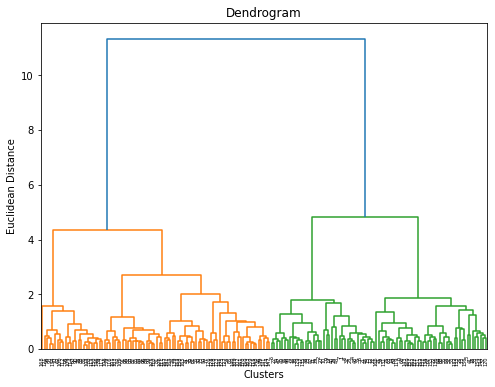

In [568]:
#Calling the Dendrogram function for the world indicators data
dendrogram(df)

In [570]:
# K Means Cluster values by calling the k Means function and using k=2
cluster_km = kmeans_function(df,2)
cluster_km

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [571]:
#Adding the K Means Cluster values to the dataframe
df_world = category(df_world, cluster_km, 'K Means')
df_world.head()

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country,Kmeans_class
0,0.025,72.0,25.0,1.990709e+11,0.044,233.0,451.0,0.023,0.1,72.0,69.0,0.9,0.272,0.681,0.047,0.682,Africa,Algeria,1
1,0.046,52.1,66.0,1.041159e+11,0.034,178.0,282.0,0.107,0.1,53.0,50.0,0.5,0.477,0.499,0.024,0.409,Africa,Angola,1
2,0.037,65.9,29.0,7.294900e+09,0.045,34.0,270.0,0.060,0.0,60.0,58.0,0.8,0.432,0.539,0.029,0.423,Africa,Benin,1
3,0.024,19.5,60.0,1.529242e+10,0.052,404.0,152.0,0.039,0.1,46.0,47.0,1.5,0.340,0.625,0.035,0.565,Africa,Botswana,1
4,0.042,43.5,13.0,1.039576e+10,0.064,39.0,270.0,0.068,0.0,56.0,55.0,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso,1


In [572]:
#Hierarchical Cluster values by calling the predict function and using k=2
cluster_hcl = hchl_predict(df,2)
cluster_hcl

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1])

In [573]:
#Adding Hierarchial Cluster Category in the dataframe
df_world = category(df_world, cluster_hcl, 'Hierarchial')
df_world.head()

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country,Kmeans_class,Hierarchial_class
0,0.025,72.0,25.0,1.990709e+11,0.044,233.0,451.0,0.023,0.1,72.0,69.0,0.9,0.272,0.681,0.047,0.682,Africa,Algeria,1,0
1,0.046,52.1,66.0,1.041159e+11,0.034,178.0,282.0,0.107,0.1,53.0,50.0,0.5,0.477,0.499,0.024,0.409,Africa,Angola,1,0
2,0.037,65.9,29.0,7.294900e+09,0.045,34.0,270.0,0.060,0.0,60.0,58.0,0.8,0.432,0.539,0.029,0.423,Africa,Benin,1,0
3,0.024,19.5,60.0,1.529242e+10,0.052,404.0,152.0,0.039,0.1,46.0,47.0,1.5,0.340,0.625,0.035,0.565,Africa,Botswana,1,0
4,0.042,43.5,13.0,1.039576e+10,0.064,39.0,270.0,0.068,0.0,56.0,55.0,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso,1,0


In [575]:
#Internal Evalation for K Means	
print('Silhouette Score for K Means Clustering:', silhouette_score(df, df_world['Kmeans_class']))
print('Calinski Harabasz Score for K Means Clustering:', calinski_harabasz_score(df, df_world['Kmeans_class']))
print('Dunn Index Score for K Means Clustering:', dunn(pairwise_distances(df), df_world['Kmeans_class']))

Silhouette Score for K Means Clustering: 0.42987453131766545
Calinski Harabasz Score for K Means Clustering: 192.54525050508803
Dunn Index Score for K Means Clustering: 0.12192108167876109


In [576]:
#Internal Evalation for Hierarchial Clustering	
print('Silhouette Score for Hierarchial Clustering:', silhouette_score(df, df_world['Hierarchial_class']))
print('Calinski Harabasz Score for Hierarchial Clustering:', calinski_harabasz_score(df, df_world['Hierarchial_class']))
print('Dunn Index Score for Hierarchial Clustering:', dunn(pairwise_distances(df), df_world['Hierarchial_class']))

Silhouette Score for Hierarchial Clustering: 0.4176400922367597
Calinski Harabasz Score for Hierarchial Clustering: 184.87996192103543
Dunn Index Score for Hierarchial Clustering: 0.14142629053178704


# The internal evaluation shows that K Means has a better score for Silhouette, CH, and Dunn Index. Hence K Means is better suited algorithm for the particular dataset

# Detailed list of all the groups and the countries included within the groups

In [577]:
#No. of countries in each cluster
df_world.groupby('Kmeans_class')['Country'].count()

Kmeans_class
0    96
1    75
Name: Country, dtype: int64

In [579]:
df_world.groupby('Kmeans_class')[df_world.columns].mean()

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Kmeans_class,Hierarchial_class
Kmeans_class,,,,,,,,,,,,,,,,,,
0,0.014375,39.665625,26.322917,6.754220e+11,0.071958,1827.843750,268.427083,0.009646,0.565625,79.343750,73.562500,1.190625,0.207104,0.682646,0.110135,0.684958,0.0,0.916667
1,0.032613,52.192000,36.360000,7.207342e+10,0.062920,127.093333,303.866667,0.050120,0.101333,63.026667,59.773333,0.644000,0.394280,0.570373,0.035360,0.392067,1.0,0.000000


In [580]:
#List of  all the 96 countries in the first cluster
df_world[df_world['Kmeans_class']==0]['Country'].unique()

array(['Egypt Arab Rep.', 'Mauritius', 'Morocco', 'Seychelles', 'Tunisia',
       'Armenia', 'Azerbaijan', 'Brunei Darussalam', 'China', 'Georgia',
       'Japan', 'Kazakhstan', 'Korea Rep.', 'Malaysia', 'Singapore',
       'Sri Lanka', 'Thailand', 'Vietnam', 'Albania', 'Austria',
       'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria',
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia',
       'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland',
       'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg',
       'Macedonia FYR', 'Malta', 'Moldova', 'Montenegro', 'Netherlands',
       'Norway', 'Poland', 'Portugal', 'Romania', 'Russian Federation',
       'Serbia', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden',
       'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom', 'Bahrain',
       'Iran Islamic Rep.', 'Israel', 'Jordan', 'Kuwait', 'Lebanon',
       'Oman', 'Qatar', 'Saudi Arabia', 'United Arab Emirates',
       'Australia', 'Fiji', 'Ne

In [581]:
#List of all the 75 countries in the second cluster
df_world[df_world['Kmeans_class']==1]['Country'].unique()

array(['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Burundi', 'Cameroon', 'Central African Republic', 'Chad',
       'Comoros', 'Congo Dem. Rep.', 'Congo Rep.', "Cote d'Ivoire",
       'Djibouti', 'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Gabon',
       'Gambia The', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya',
       'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania',
       'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda',
       'Sao Tome and Principe', 'Senegal', 'Sierra Leone', 'South Africa',
       'Sudan', 'Swaziland', 'Tanzania', 'Togo', 'Uganda', 'Zambia',
       'Afghanistan', 'Bangladesh', 'Bhutan', 'Cambodia', 'India',
       'Indonesia', 'Kyrgyz Republic', 'Lao PDR', 'Mongolia', 'Nepal',
       'Pakistan', 'Philippines', 'Tajikistan', 'Timor-Leste',
       'Uzbekistan', 'Iraq', 'Yemen Rep.', 'Kiribati',
       'Micronesia Fed. Sts.', 'Papua New Guinea', 'Solomon Islands',
       'Tonga', 'Vanuatu', 'Belize', 'Bolivia', 'Guatema

# Scatter Plots

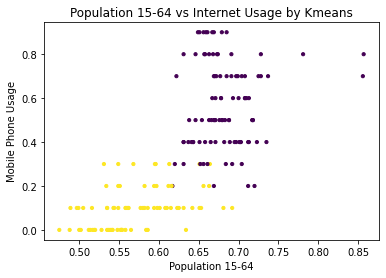

In [584]:
#1) Scatter plot of Population 15-64 vs Internet Usage
plt.scatter(df_world['Population 15-64'],df_world['Internet Usage'], c=df_world['Kmeans_class'], s= 10)
plt.xlabel('Population 15-64')
plt.ylabel('Mobile Phone Usage')
plt.title('Population 15-64 vs Internet Usage by Kmeans')
plt.show()

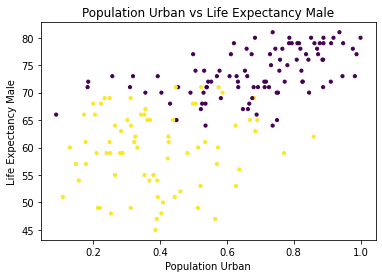

In [583]:
#2) Scatter plot of Population Urban vs Life Expectancy Male
plt.scatter(df_world['Population Urban'],df_world['Life Expectancy Male'], c=df_world['Kmeans_class'], s= 10)
plt.xlabel('Population Urban')
plt.ylabel('Life Expectancy Male')
plt.title('Population Urban vs Life Expectancy Male')
plt.show()

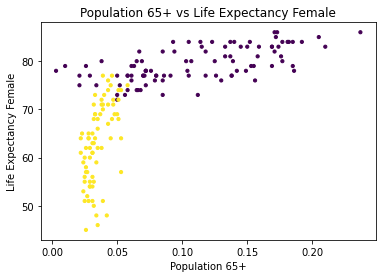

In [585]:
#3) Scatter plot of Population 65+ vs Life Expectancy Female
plt.scatter(df_world['Population 65+'],df_world['Life Expectancy Female'], c=df_world['Kmeans_class'], s= 10)
plt.xlabel('Population 65+')
plt.ylabel('Life Expectancy Female')
plt.title('Population 65+ vs Life Expectancy Female')
plt.show()

Internal Evaluation Metrics :

1.   Dunn Index = (intercluster distance) /(highest intracluster distance)
2.   CH Score coefficient =(SSBM/(M−1))/(SSEM/M)
3.   Silhouette_score = (b(i) −a(i))/max{a(i),b(i)}